In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from tdoa import tdoa_trilateration, generate_random_tdoa_data

Sound Location: [499.19828352 499.78690442]
Microphone Locations: [[399.9217443  493.03036843]
 [473.40527809 492.36844734]
 [454.6341416  278.24167297]]
Time Differences: [((1, 0), -0.21547922687086357), ((2, 1), 0.5896929173610818)]
Deviation: 13.775325006700692


/home/psaegert/Projects/sound-location/src/tdoa/tdoa.py:29: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  return fsolve(equations, (0, 0))


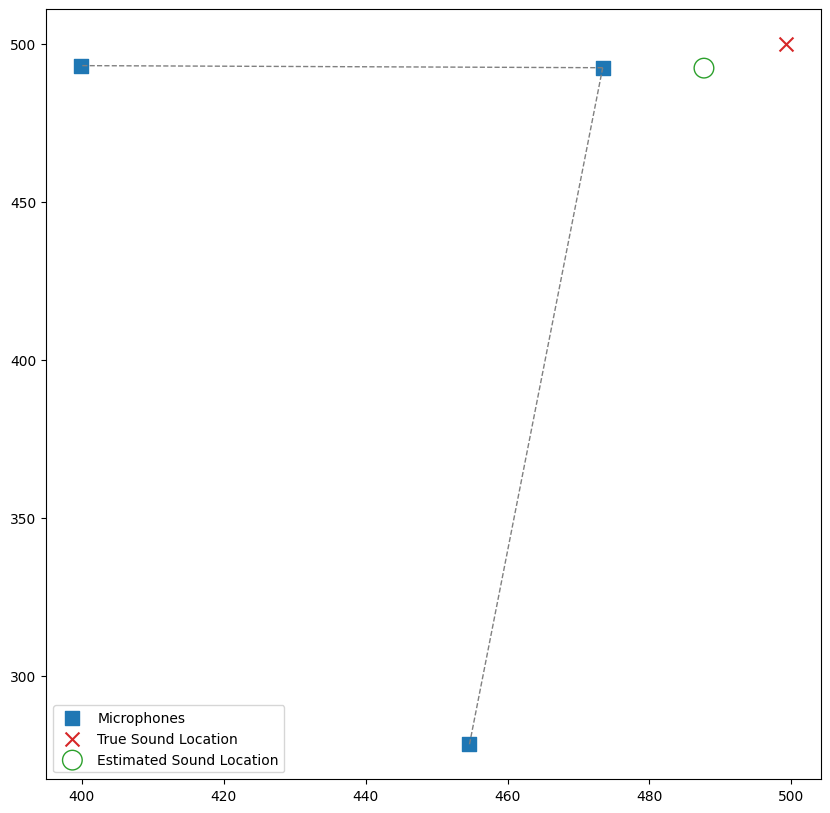

In [15]:
sound_loc, mic_locations, time_diffs = generate_random_tdoa_data(0, 500, n=3, noise=0.01)
print('Sound Location: {}'.format(sound_loc))
print('Microphone Locations: {}'.format(mic_locations))
print('Time Differences: {}'.format(time_diffs))

# Estimate sound location
est_loc = tdoa_trilateration(mic_locations, time_diffs)

print(f'Deviation: {np.sqrt((sound_loc[0] - est_loc[0])**2 + (sound_loc[1] - est_loc[1])**2)}')

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot sound location, microphone locations, and estimated sound source location
ax.scatter(*zip(*mic_locations), color='tab:blue', label='Microphones', s=100, marker='s')
ax.scatter(*sound_loc, color='tab:red', label='True Sound Location', s=100, marker='x')
ax.scatter(*est_loc, color='tab:green', label='Estimated Sound Location', facecolors='none', s=200, marker='o')

# Plot faint lines between microphone pairs
for mic_pair, time_diff in time_diffs:
    i, j = mic_pair
    x1, y1 = mic_locations[i]
    x2, y2 = mic_locations[j]
    ax.plot([x1, x2], [y1, y2], color='gray', linestyle='dashed', linewidth=1)

ax.legend();